In [45]:
import sys, os, glob, tqdm
sys.path.append('/home/gddaslab/mxp140/tcr_project_ultimate')

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from constants import patient_names

In [28]:
pooled_data_filename = "/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-PANPEP.csv"
find_regionwise_data_filename_in = "/home/gddaslab/mxp140/tcr_project_ultimate/data/glioblastoma_data/PANPEP"

asterisk = '\u2217'
p_value_stars = {0.001: f'{asterisk}{asterisk}{asterisk}', 0.01: f'{asterisk}{asterisk}', 0.05: f'{asterisk}'}
def get_asterisks(p_value):
    for threshold in sorted(p_value_stars.keys()):
        if p_value < threshold:
            return p_value_stars[threshold]
    return 'ns'

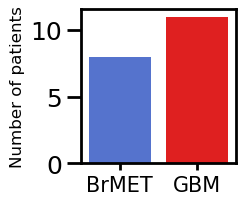

In [27]:
def fig1():
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'patient': patient_names,
        'type': ['BrMET' if 'BrMET' in name else 'GBM' for name in patient_names]
    })
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
    sns.countplot(data=df, x='type', hue='type', palette={'BrMET':'royalblue', 'GBM':'red'}, ax=ax)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(
        axis="x", which="major", direction="out", length=5, width=2, labelsize=15
    )
    ax.tick_params(
        axis="y", which="major", direction="out", length=10, width=2, labelsize=18
    )
    ax.set_xlabel('')
    ax.set_ylabel('Number of patients', fontsize=12)
    plt.show()
fig1()

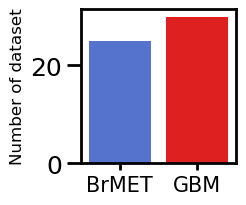

                   CDR3         kr  counts
0      CA*VPHPCYSNQPQHF  14.520898       1
1         CAISARGGQPQHF  24.763988       1
2          CAISDGTYEQYF  40.299248       1
3        CAISGDRGPYEQYF  36.365630       1
4       CAR*SQGARENEQFF  13.002739       1
..                  ...        ...     ...
351  CSVGLTGDKSSGANVLTF  15.540187       1
352       CSVGQGSVYGYTF  31.569108       1
353      CSVPTGRGGREQYF  14.776450       1
354        CSVRLATGELFF  33.815846       1
355    WPAVEW*LHFSETQYF  14.021452       1

[356 rows x 3 columns]


In [42]:
def fig2():
    names, types = [], []
    for patient_id in patient_names:
        filepath_format = os.path.join(find_regionwise_data_filename_in, patient_id, f"{patient_id}_region*.csv")
        full_filepath = glob.glob(filepath_format)
        sorted_by_region_full_filepath = sorted(full_filepath, key=lambda x: int(x.split("region")[1].split(".")[0]))
        for file in sorted_by_region_full_filepath:
            name = os.path.basename(file).strip('.csv')
            type_ = 'BrMET' if name.startswith('BrMET') else 'GBM'
            names.append(name)
            types.append(type_)
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'patient': names,
        'type': types
    })
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
    sns.countplot(data=df, x='type', hue='type', palette={'BrMET':'royalblue', 'GBM':'red'}, ax=ax)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(
        axis="x", which="major", direction="out", length=5, width=2, labelsize=15
    )
    ax.tick_params(
        axis="y", which="major", direction="out", length=10, width=2, labelsize=18
    )
    ax.set_xlabel('')
    ax.set_ylabel('Number of dataset', fontsize=12)
    plt.show()
    print(pd.read_csv(file))
fig2()

100%|██████████| 19/19 [00:30<00:00,  1.61s/it]


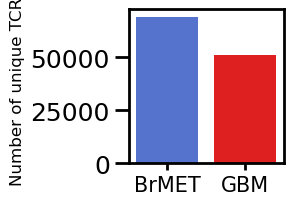

In [49]:
def fig3():
    unique_cdr3s_brmet, unique_cdr3s_GBM = [], []
    unique_cdr3_dict = {'BrMET':unique_cdr3s_brmet, 'GBM':unique_cdr3s_GBM}
    for patient_id in tqdm.tqdm(patient_names):
        filepath_format = os.path.join(find_regionwise_data_filename_in, patient_id, f"{patient_id}_region*.csv")
        full_filepath = glob.glob(filepath_format)
        sorted_by_region_full_filepath = sorted(full_filepath, key=lambda x: int(x.split("region")[1].split(".")[0]))
        type_ = 'BrMET' if patient_id.startswith('BrMET') else 'GBM'
        unique_cdr3_file = unique_cdr3_dict.get(type_)
        for file in sorted_by_region_full_filepath:
            file_df = pd.read_csv(file)
            for cdr3 in file_df['CDR3'].unique():
                if cdr3 not in unique_cdr3_file:
                    unique_cdr3_file.append(cdr3)
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'type': ['BrMET', 'GBM'],
        'ntcr':[len(unique_cdr3s_brmet), len(unique_cdr3s_GBM)]
    })
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
    sns.barplot(data=df, x='type', y='ntcr', hue='type', palette={'BrMET':'royalblue', 'GBM':'red'}, ax=ax)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(
        axis="x", which="major", direction="out", length=5, width=2, labelsize=15
    )
    ax.tick_params(
        axis="y", which="major", direction="out", length=10, width=2, labelsize=18
    )
    ax.set_xlabel('')
    ax.set_ylabel('Number of unique TCRs', fontsize=12)
    plt.show()
fig3()